# Workshop5. Линейная регрессия. (33 балла)

> Линейная регрессия - это не повод для затяжной депрессии.

1. Скачайте этот ноутбук к себе.
2. Заполните пропущенные ячейки, отвечая на заданные вопросы. Там должен быть код! (если не сказано обратное)
3. Сохраните результат в своём гитхаб репозитории.

### Полезная литература

- [Первый конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture02-linregr.pdf)
- [Второй конспект лекции про линейную регрессию из курса ФШЭ](https://github.com/esokolov/ml-course-hse/blob/master/2016-fall/lecture-notes/lecture03-linregr.pdf)
- [Теория из курса ODS](https://github.com/Yorko/mlcourse_open/blob/master/jupyter_notebooks/topic04_linear_models/topic4_linear_models_part1_mse_likelihood_bias_variance.ipynb)
- [Материалы из курса от МФТИ](https://www.coursera.org/specializations/machine-learning-data-analysis)
- [Статья про лин.рег. от ODS на habrahabr](https://habrahabr.ru/company/ods/blog/323890/)

## Данные

Возьмем датасет о стоимости домов: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data.

```
SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
MSSubClass: The building class
MSZoning: The general zoning classification
LotFrontage: Linear feet of street connected to property
LotArea: Lot size in square feet
Street: Type of road access
Alley: Type of alley access
LotShape: General shape of property
LandContour: Flatness of the property
Utilities: Type of utilities available
LotConfig: Lot configuration
LandSlope: Slope of property
Neighborhood: Physical locations within Ames city limits
Condition1: Proximity to main road or railroad
Condition2: Proximity to main road or railroad (if a second is present)
BldgType: Type of dwelling
HouseStyle: Style of dwelling
OverallQual: Overall material and finish quality
OverallCond: Overall condition rating
YearBuilt: Original construction date
YearRemodAdd: Remodel date
RoofStyle: Type of roof
RoofMatl: Roof material
Exterior1st: Exterior covering on house
Exterior2nd: Exterior covering on house (if more than one material)
MasVnrType: Masonry veneer type
MasVnrArea: Masonry veneer area in square feet
ExterQual: Exterior material quality
ExterCond: Present condition of the material on the exterior
Foundation: Type of foundation
BsmtQual: Height of the basement
BsmtCond: General condition of the basement
BsmtExposure: Walkout or garden level basement walls
BsmtFinType1: Quality of basement finished area
BsmtFinSF1: Type 1 finished square feet
BsmtFinType2: Quality of second finished area (if present)
BsmtFinSF2: Type 2 finished square feet
BsmtUnfSF: Unfinished square feet of basement area
TotalBsmtSF: Total square feet of basement area
Heating: Type of heating
HeatingQC: Heating quality and condition
CentralAir: Central air conditioning
Electrical: Electrical system
1stFlrSF: First Floor square feet
2ndFlrSF: Second floor square feet
LowQualFinSF: Low quality finished square feet (all floors)
GrLivArea: Above grade (ground) living area square feet
BsmtFullBath: Basement full bathrooms
BsmtHalfBath: Basement half bathrooms
FullBath: Full bathrooms above grade
HalfBath: Half baths above grade
Bedroom: Number of bedrooms above basement level
Kitchen: Number of kitchens
KitchenQual: Kitchen quality
TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
Functional: Home functionality rating
Fireplaces: Number of fireplaces
FireplaceQu: Fireplace quality
GarageType: Garage location
GarageYrBlt: Year garage was built
GarageFinish: Interior finish of the garage
GarageCars: Size of garage in car capacity
GarageArea: Size of garage in square feet
GarageQual: Garage quality
GarageCond: Garage condition
PavedDrive: Paved driveway
WoodDeckSF: Wood deck area in square feet
OpenPorchSF: Open porch area in square feet
EnclosedPorch: Enclosed porch area in square feet
3SsnPorch: Three season porch area in square feet
ScreenPorch: Screen porch area in square feet
PoolArea: Pool area in square feet
PoolQC: Pool quality
Fence: Fence quality
MiscFeature: Miscellaneous feature not covered in other categories
MiscVal: $Value of miscellaneous feature
MoSold: Month Sold
YrSold: Year Sold
SaleType: Type of sale
SaleCondition: Condition of sale
```

Целевой переменной будет `SalePrice`. То есть мы будем предсказывать стоимость жилья на основе его характеристик. Это задание будет не то чтобы про линейную регрессию, но про попытку построить модель для предсказания цен на дом. В принципе я бы мог еще добавить заданий на более тщательный отбор признаков, логарифмирование признаков, у которых сильное смещение "скоса"(skew). Можно было бы анализировать и выпрямлять распределение целевой переменной. Можно было бы генерировать новые признаки из существующих, строить ансамбли моделей. Но мы ограничимся, пока что.......

In [163]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm, kurtosis, probplot
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [164]:
df = pd.read_csv('../data/house_prices.csv.gz', index_col='Id')
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [165]:
assert df.shape == (1460, 80)

In [166]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

## 1.0 Анализ целевого признака (3 балла)

Удостоверимся, что раcпределение целевого признака "хорошее", без странных выбросов. В идеале мы хотим видеть нормальное распределени или достаточно похожее на него, без очень длинных "хвостов" выбросов.

_Почему требуется нормальность распределения: ищите объяснения линейной регресси через алгоритмы максимизации правдоподобия. В итоге, грубо говоря, суть сводится к тому, что с ростом объема выборки, оценка максимального правдоподобия лучше описывает нормальное распределение._

[Коэффициент эксцесса](http://www.machinelearning.ru/wiki/index.php?title=%D0%9A%D0%BE%D1%8D%D1%84%D1%84%D0%B8%D1%86%D0%B8%D0%B5%D0%BD%D1%82_%D1%8D%D0%BA%D1%81%D1%86%D0%B5%D1%81%D1%81%D0%B0) показывает степень остроты пика распределения случайной величины. Для нормального распределения он равен `0`. Если хвосты распределения «тяжелее», а пик более «приплюснутый», чем у нормального распределения, то коэффициент < 0. А если хвосты легкие, то больше 0. В нашем случае должно получиться околов `6.5`.

Задание: 
- Нарисуйте график распределения `SalePrice`, используйте аргумент `fit=scipy.stats.norm`, чтобы нарисовать предполагаемое нормальное распределение. Напечатайте значение коэффициент эксцесса `kurtosis` для этого признака.
- Нарисуйте график [scipy.stats.probplot](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.probplot.html) - он покажет нам реальные квантили выборки и теоретические. По нему можно видеть, на сколько много выьросов и на сколько выборка предсказуема.
- Что вы можете сказать по поводу выборки основываясь на `probplot`.  [wiki](https://en.wikipedia.org/wiki/Normal_probability_plot)

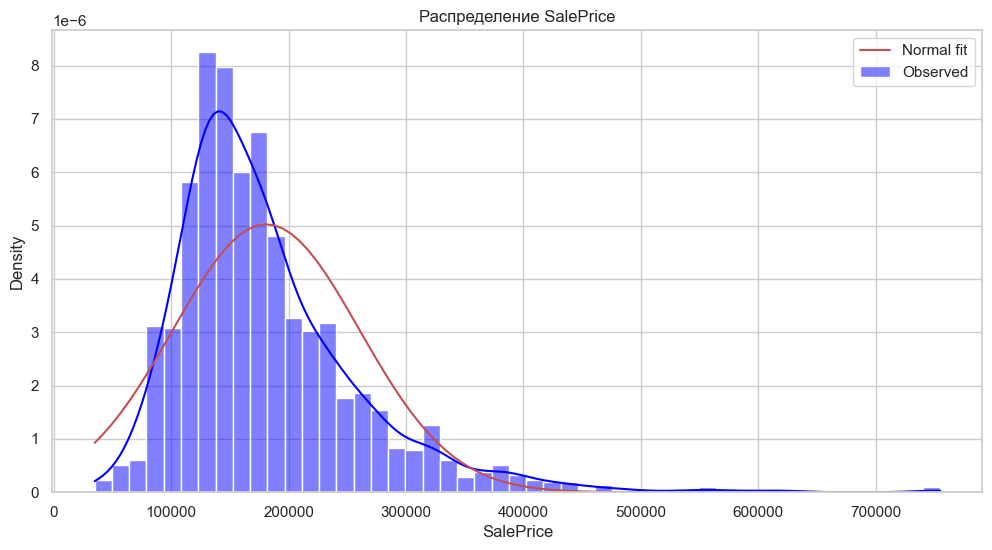

Коэффициент эксцесса SalePrice: 6.509812011089439


In [167]:
# Распределение SalePrice
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

sns.histplot(df['SalePrice'], kde=True, stat="density", color="blue", label="Observed")

# Наложение нормального распределения
mean, std = norm.fit(df['SalePrice'])
x = np.linspace(df['SalePrice'].min(), df['SalePrice'].max(), 100)
pdf = norm.pdf(x, mean, std)
plt.plot(x, pdf, 'r-', label="Normal fit")

plt.title("Распределение SalePrice")
plt.xlabel("SalePrice")
plt.ylabel("Density")
plt.legend()
plt.show()

# Коэффициент эксцесса
kurt_value = kurtosis(df['SalePrice'], fisher=True)
print(f"Коэффициент эксцесса SalePrice: {kurt_value}")

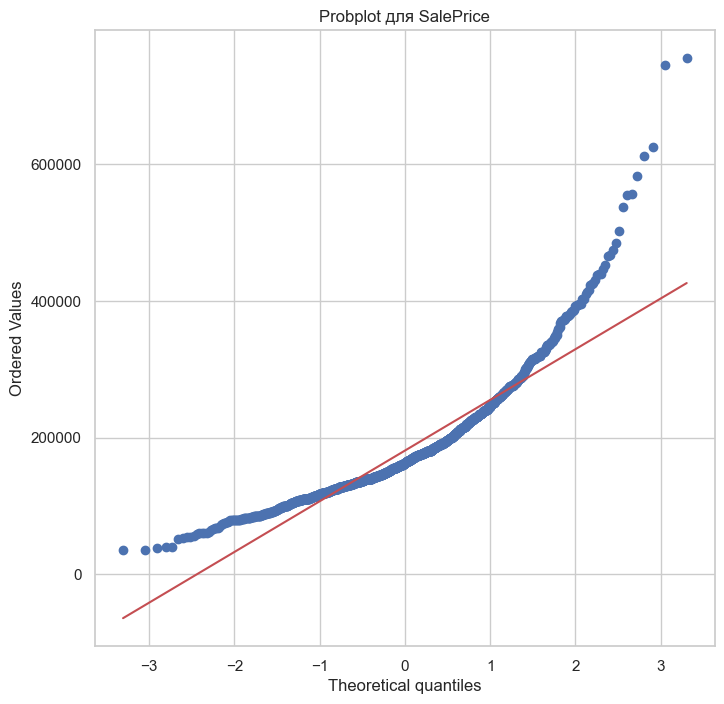

In [168]:
# Probplot
plt.figure(figsize=(8, 8))
probplot(df['SalePrice'], dist="norm", plot=plt)
plt.title("Probplot для SalePrice")
plt.show()

Ответ: по поводу выборки можно сказать, что распределение смещено влево. Выбросов не слишком много

## 1.2 Анализ некоторых зависимостей (3 балла)

У нас очень много разных признаков. Любопытно построить разные графики. Позаботьтесь о красоте и наглядности графиков, сделайте так, чтобы они были большими и их можно было прочесть. Даже подписи на графиках должны быть читаемые!!

Задания: Постройте графики, отражающие зависимости этих признаков:
- дата постройки дома и его стоимости
- "качество дома и материалов" и его стоимости
- площадь дома и стоимость

Hints: Вспомните про boxplot, jointplot, lmplot...

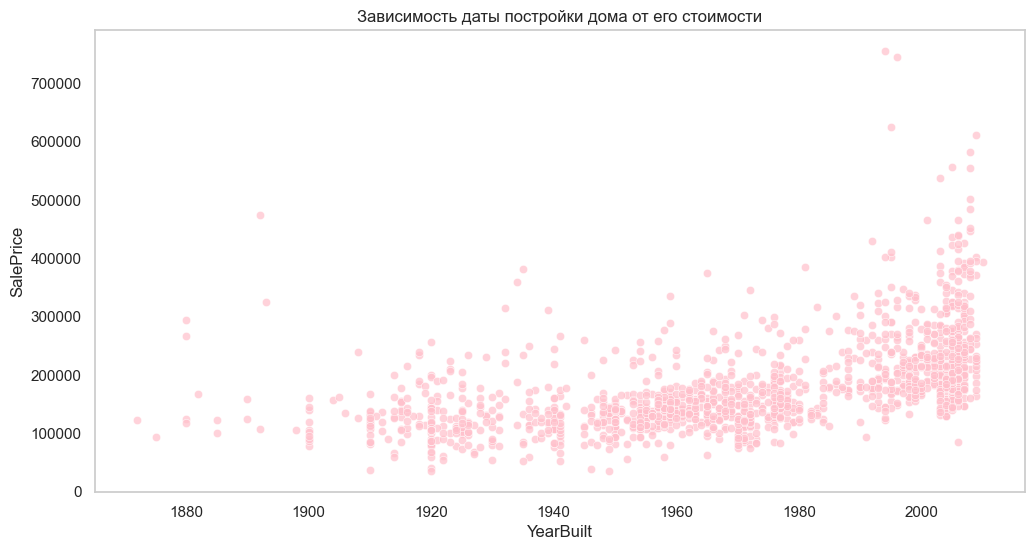

In [169]:
# График зависимости даты постройки дома и его стоимости
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x="YearBuilt", y="SalePrice", alpha=0.7, color="pink")
plt.title("Зависимость даты постройки дома от его стоимости")
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.grid()
plt.show()

C:\Users\Simon\AppData\Local\Temp\ipykernel_21124\1335932059.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x="OverallQual", y="SalePrice", palette="coolwarm")


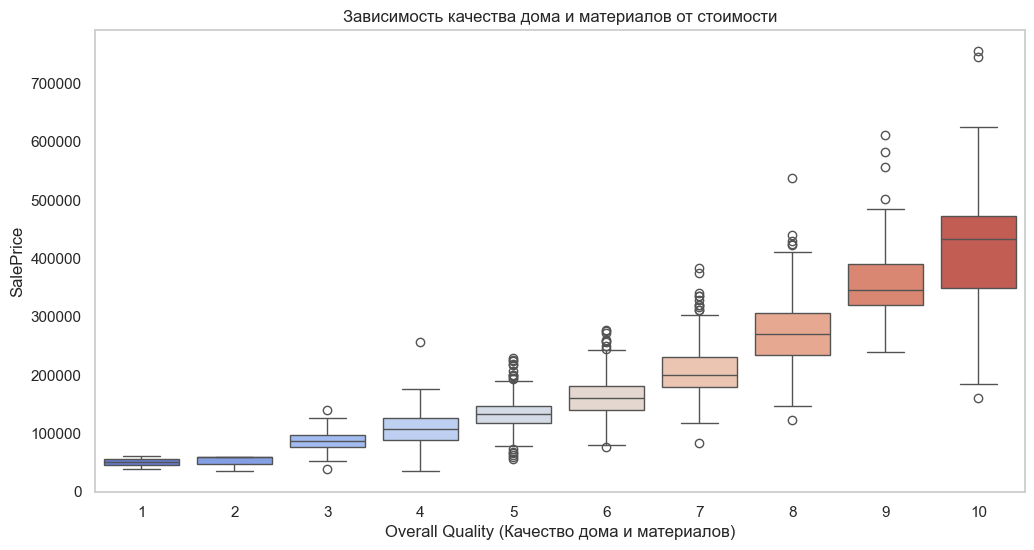

In [170]:
# График зависимости качества дома и материалов от стоимости
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="OverallQual", y="SalePrice", palette="coolwarm")
plt.title("Зависимость качества дома и материалов от стоимости")
plt.xlabel("Overall Quality (Качество дома и материалов)")
plt.ylabel("SalePrice")
plt.grid(axis='y')
plt.show()


<Figure size 1200x600 with 0 Axes>

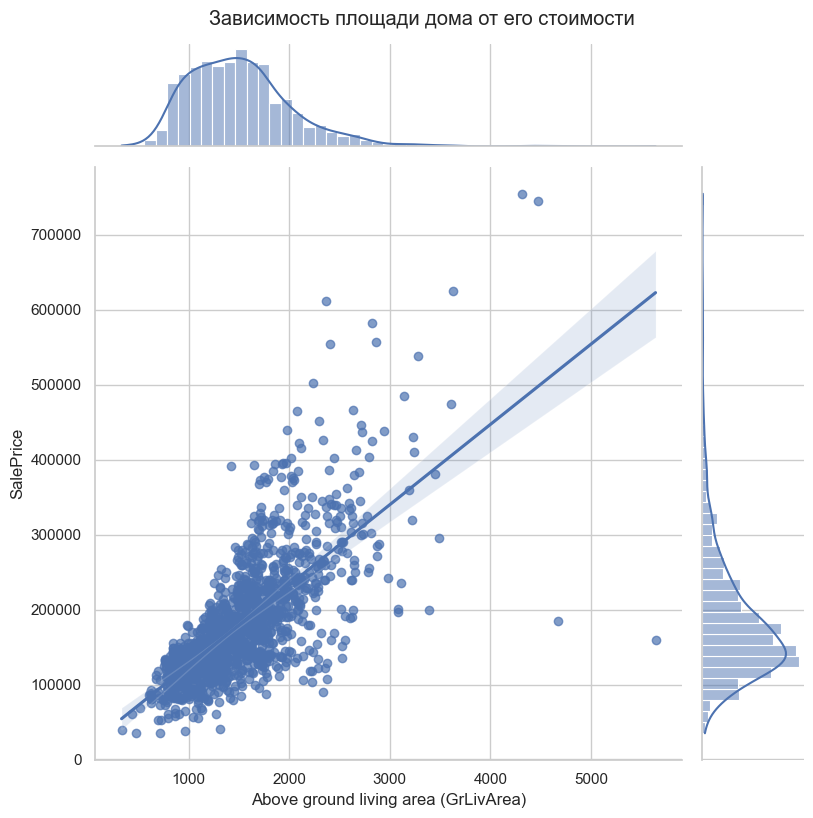

In [171]:
# График зависимости площади дома и стоимости
plt.figure(figsize=(12, 6))
sns.jointplot(data=df, x="GrLivArea", y="SalePrice", kind="reg", height=8, scatter_kws={'alpha':0.7})
plt.suptitle("Зависимость площади дома от его стоимости", y=1.02)
plt.xlabel("Above ground living area (GrLivArea)")
plt.ylabel("SalePrice")
plt.show()

## 1.2 Heatmap (3 балла)

Судя по предыдущим графикам, есть некоторые линейные зависимости. Но строить по графику на каждый признак из 80 штук немного долго и не наглядно. Постройте красивый график корреляции всех признаков. Используйте цвета `RdYlGn`, так будет нагляднее. Не забудьте применить маску, чтобы убрать дублирующую половину матрицы.

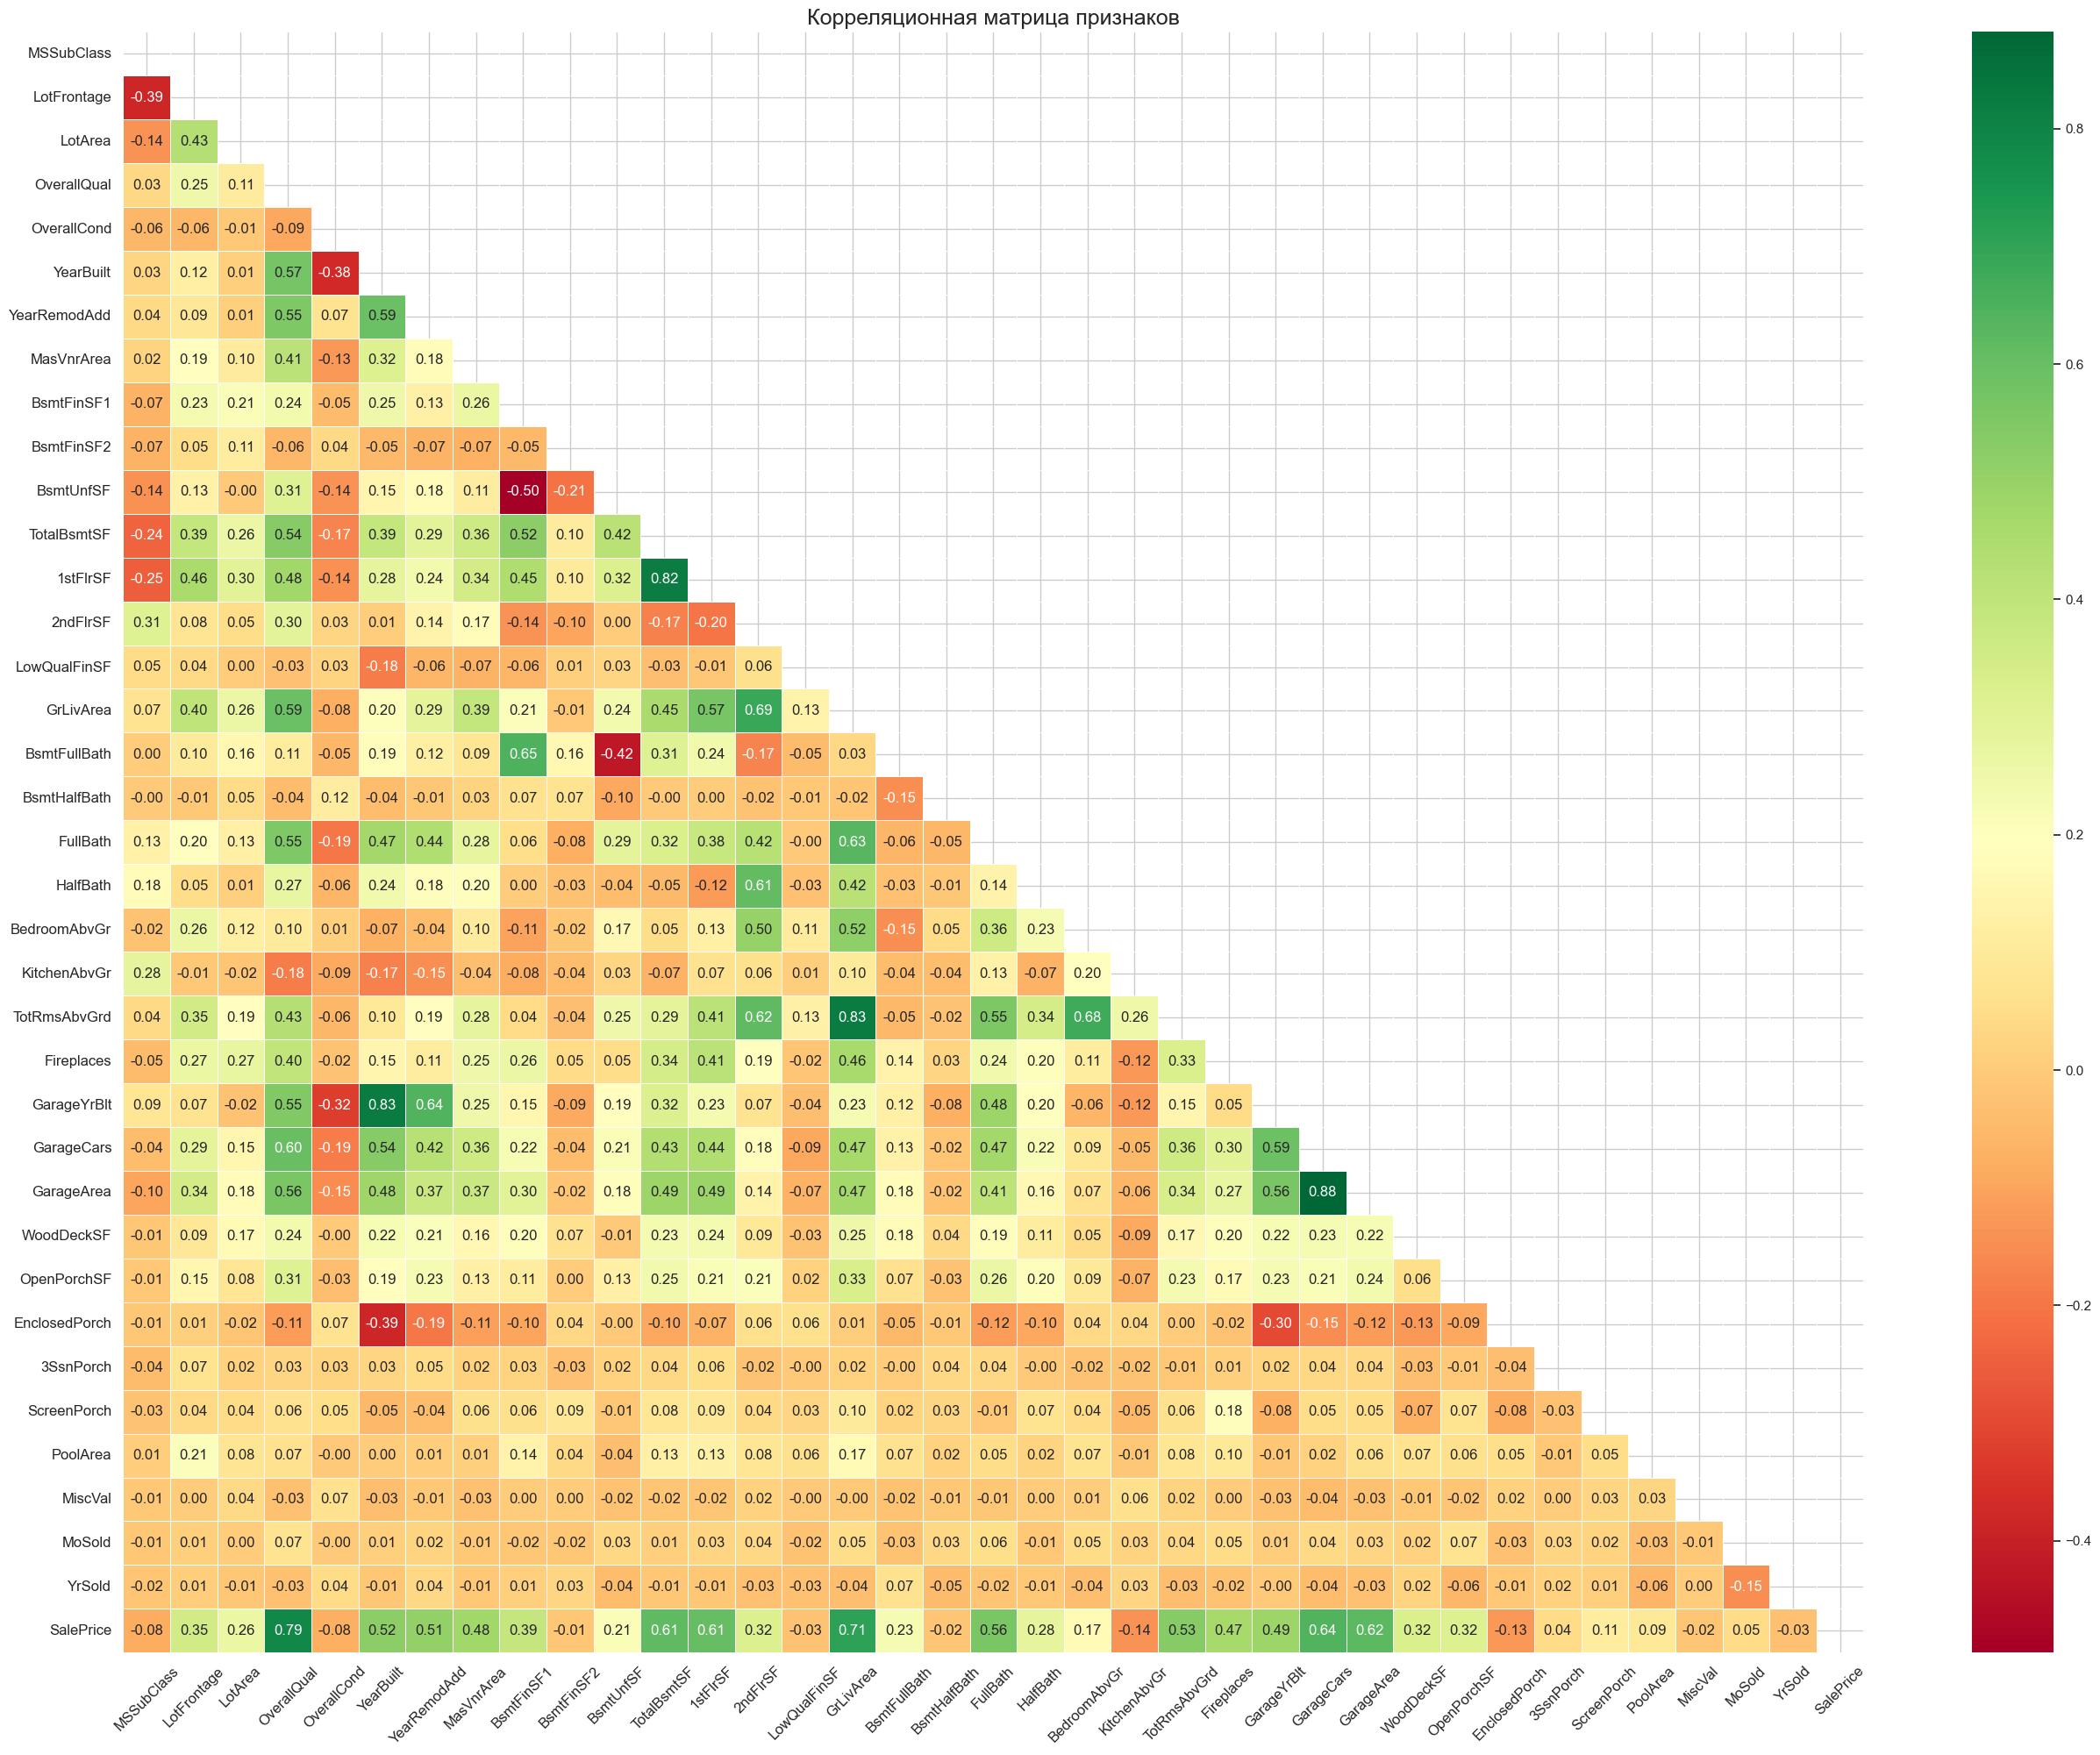

In [172]:
# categorical_columns = df.select_dtypes(include=['object']).columns

# # Применение one-hot кодирования ко всем категориальным признакам
# df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

numeric_df = df.select_dtypes(include=[np.number])
corr_matrix = numeric_df.corr()

# Маска
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

plt.figure(figsize=(32, 24))

# heatmap
sns.heatmap(
    corr_matrix, 
    mask=mask, 
    cmap="RdYlGn", 
    annot=True,     # Отображение значений корреляции
    fmt=".2f",      # Формат значений
    linewidths=0.5, 
    cbar_kws={"shrink": 1}
)

plt.title("Корреляционная матрица признаков", fontsize=18)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()

Большая матрица 38x38 ячеек. И мы видим, там есть сильно коррелируемые объекты с нашей целевой переменной. 

- Нарисуйте крупно heatmap этих сильно коррелируемых объектов( больше 0.5 по абсолютному значению) и сделайте так, чтобы в каждой ячейке было значение корреляции. 
- Выведите список этих сильно коррелируемых признаков.
- Желательно сделать heatmap диагональной матрицей, чтобы было красиво (в теории был пример)

Запомним эти признаки!

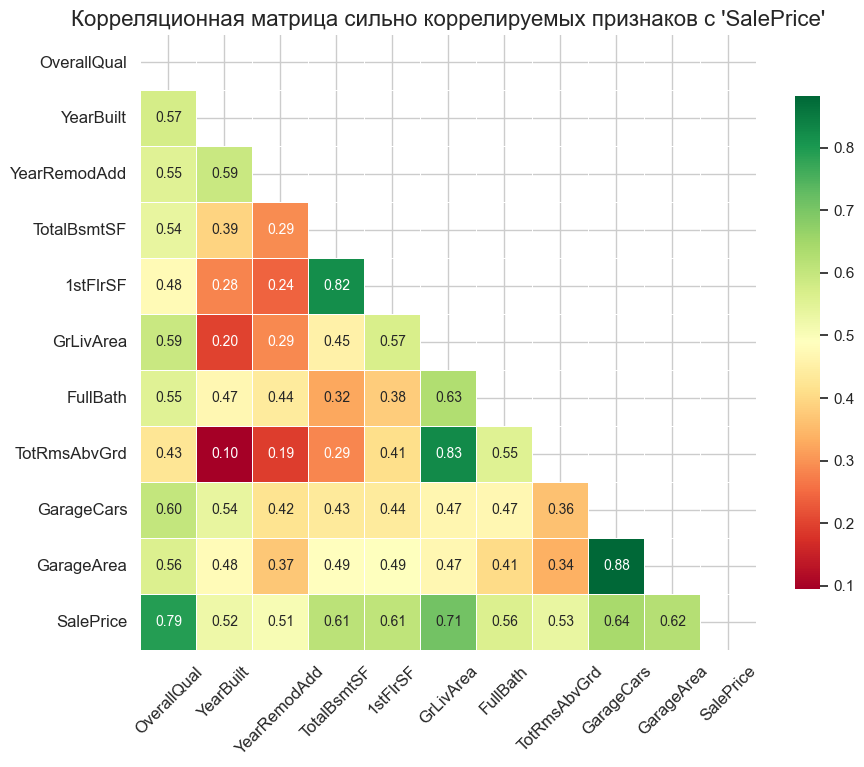

Сильно коррелируемые признаки с 'SalePrice' (абс. корреляция > 0.5):
Index(['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF',
       'GrLivArea', 'FullBath', 'TotRmsAbvGrd', 'GarageCars', 'GarageArea',
       'SalePrice'],
      dtype='object')


In [173]:
target = "SalePrice"

high_corr_features = corr_matrix[abs(corr_matrix[target]) > 0.5][target].index

high_corr_matrix = corr_matrix.loc[high_corr_features, high_corr_features]
high_mask = np.triu(np.ones_like(high_corr_matrix, dtype=bool))


# Настройка графика для heatmap
plt.figure(figsize=(10, 8))

sns.heatmap(
    high_corr_matrix, 
    mask=high_mask, 
    annot=True, 
    fmt=".2f",   
    cmap="RdYlGn", 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8},  
    square=True, 
    annot_kws={"size": 10} 
)

plt.title("Корреляционная матрица сильно коррелируемых признаков с 'SalePrice'", fontsize=16)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)
plt.show()

# Выводим список признаков с корреляцией > 0.5 по абсолютному значению с целевой переменной
print("Сильно коррелируемые признаки с 'SalePrice' (абс. корреляция > 0.5):")
print(high_corr_features)

## 1.3 Пропущеные данные (3 балла)

Задание:
 - Посчитайте общее количество пропущенных данных по каждому признаку
 - посчитайте долю пропущенных данных выборки
 - удалите из выборки признаки, доля пропущенных которых больще 10%
 - пропущенные категориальные заполните словом 'unknown' (у них dtype object)
 - пропущенные числовые заполните средним (у них dtype float)

Hinst: https://stackoverflow.com/a/38134049/3205200

In [174]:
# Общее количество пропущенных данных
missing_data_count = df.isnull().sum()

# Доля пропущенных данных
missing_data_percentage = (missing_data_count / len(df)) * 100

print("Общее количество пропущенных данных по признакам:")
print(missing_data_count)
print("\nДоля пропущенных данных по признакам:")
display(missing_data_percentage.sort_values(ascending=False))

Общее количество пропущенных данных по признакам:
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

Доля пропущенных данных по признакам:


PoolQC         99.520548
MiscFeature    96.301370
Alley          93.767123
Fence          80.753425
MasVnrType     59.726027
                 ...    
Heating         0.000000
HeatingQC       0.000000
MSZoning        0.000000
1stFlrSF        0.000000
SalePrice       0.000000
Length: 80, dtype: float64

In [175]:
# Удаляем признаки
columns_to_drop = missing_data_percentage[missing_data_percentage > 10].index
df_cleaned = df.drop(columns=columns_to_drop)

# Заполняем пропущенные
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
df_cleaned[categorical_columns] = df_cleaned[categorical_columns].fillna('unknown')

numerical_columns = df_cleaned.select_dtypes(include=['float', 'int']).columns
df_cleaned[numerical_columns] = df_cleaned[numerical_columns].fillna(df_cleaned[numerical_columns].mean())

print("\nИнформация о датафрейме после обработки пропущенных данных:")
display(df_cleaned.info())


Информация о датафрейме после обработки пропущенных данных:
<class 'pandas.core.frame.DataFrame'>
Index: 1460 entries, 1 to 1460
Data columns (total 73 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotArea        1460 non-null   int64  
 3   Street         1460 non-null   object 
 4   LotShape       1460 non-null   object 
 5   LandContour    1460 non-null   object 
 6   Utilities      1460 non-null   object 
 7   LotConfig      1460 non-null   object 
 8   LandSlope      1460 non-null   object 
 9   Neighborhood   1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Condition2     1460 non-null   object 
 12  BldgType       1460 non-null   object 
 13  HouseStyle     1460 non-null   object 
 14  OverallQual    1460 non-null   int64  
 15  OverallCond    1460 non-null   int64  
 16  YearBuilt      1460 non-null   int64  
 

None

## 1.4 Категориальные переменные (1 балл)

На сколько вы помните, линейная регрессия не умеет обрабатывать категориальные признаки, так как ей нужны ЧИСЛА. Но не беда, в pandas есть встроенная функция [get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Задание:
- сконвертируйте все категориальные признаки(dtype=object) в вектора числовых с помощью get_dummies
- напечатайте сколько у вас теперь признаков
- Положите в переменную X все данные из датасета, кроме целевой переменной. Положите в переменную y только целевую переменную.

In [176]:
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

print(f"Количество признаков после конвертации: {df_encoded.shape[1]}")

Количество признаков после конвертации: 239


In [177]:
# Разделяем данные на X и y
X = df_encoded.drop(columns=['SalePrice'])
y = df_encoded['SalePrice']

print("\nПример данных X (первые 5 строк):")
print(X.head())
print("\nПример данных y (первые 5 строк):")
print(y.head())


Пример данных X (первые 5 строк):
    MSSubClass  LotArea  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
Id                                                                           
1           60     8450            7            5       2003          2003   
2           20     9600            6            8       1976          1976   
3           60    11250            7            5       2001          2002   
4           70     9550            7            5       1915          1970   
5           60    14260            8            5       2000          2000   

    MasVnrArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  ...  SaleType_ConLI  \
Id                                                 ...                   
1        196.0         706           0        150  ...           False   
2          0.0         978           0        284  ...           False   
3        162.0         486           0        434  ...           False   
4          0.0         216           0        54

## 1.5 Переобучение (3 балла)

Обучим обычную модель без регуляризации [sklearn.linear_model.LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html).

- Выведите все коэффициенты для каждого признака, отсортировав по возрастанию по модулю значения коэффициента. Используйте print и for, иначе jupyter схлопнет вывод numpy массива. Можете округлить коэффициенты до 2 знаков после запятой.
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error)

In [178]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [179]:
coefficients = model.coef_
sorted_idx = np.argsort(np.abs(coefficients))

print("Коэффициенты модели, отсортированные по возрастанию по модулю:")
for idx in sorted_idx:
    print(f"Признак: {X.columns[idx]}, Коэффициент: {coefficients[idx]:.2f}")

cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

# Печатаем MSE
mean_mse_linear = -cv_scores.mean()  # возвращается как отрицательное значение
print(f"\nСредняя ошибка предсказания (MSE) на 5 фолдах: {mean_mse_linear:.2f}")

Коэффициенты модели, отсортированные по возрастанию по модулю:
Признак: MiscVal, Коэффициент: 0.12
Признак: LotArea, Коэффициент: 0.76
Признак: BsmtUnfSF, Коэффициент: -1.92
Признак: OpenPorchSF, Коэффициент: 2.53
Признак: EnclosedPorch, Коэффициент: 4.41
Признак: BsmtFinSF2, Коэффициент: 7.02
Признак: WoodDeckSF, Коэффициент: 13.41
Признак: MasVnrArea, Коэффициент: 13.43
Признак: 1stFlrSF, Коэффициент: 15.37
Признак: BsmtFinSF1, Коэффициент: 17.42
Признак: GarageArea, Коэффициент: 18.38
Признак: LowQualFinSF, Коэффициент: -19.53
Признак: MSSubClass, Коэффициент: -19.79
Признак: TotalBsmtSF, Коэффициент: 22.52
Признак: ScreenPorch, Коэффициент: 28.59
Признак: GarageYrBlt, Коэффициент: -30.18
Признак: GrLivArea, Коэффициент: 31.15
Признак: 3SsnPorch, Коэффициент: 31.41
Признак: 2ndFlrSF, Коэффициент: 35.32
Признак: CentralAir_Y, Коэффициент: 62.34
Признак: PavedDrive_Y, Коэффициент: 83.14
Признак: PoolArea, Коэффициент: 85.11
Признак: YearRemodAdd, Коэффициент: 100.63
Признак: GarageFin

К счастью в этот раз коэффициенты при признаках не улетели в космос, но всё равно достигли очень больших значений. Например `RoofStyle_Shed` получился в моем случае около `-514961`. А у некоторых признаков коэффициент уже равен 0, хотя не была применена регуляризация.

## 1.6 Ridge и Lasso (4 балла)

- Обучите Lasso и Ridge для разных значений регуляризации alpha
- нарисуйте график значений коэффициентов модели для каждого признака, как мы делали на практике. По оси X будет значение alpha, по Y - значение коэффициента. на графике будет "радуга" из линий разных цветов(линий столько, сколько признаков).
- Нарисуйте гистограмму, в которой по оси Y будет количество коэффициентов, равных 0 (<0.0001) для Loss регресиии, а по оси X - значение коэффициента альфа.

alpha взять от 1 до 500 с каким-нибудь шагом. Но не переборщите, а то долго будете ждать.

In [180]:
from sklearn.linear_model import Lasso, Ridge
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

alphas = np.arange(1, 501, 10)

lasso_coefficients = []
ridge_coefficients = []
lasso_zero_coefficients = []
ridge_zero_coefficients = []

for alpha in alphas:
    # Lasso
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    lasso_coefficients.append(lasso.coef_)
    lasso_zero_coefficients.append(np.sum(np.abs(lasso.coef_) < 0.0001))  # Количество коэффициентов = 0
    
    # Ridge
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    ridge_coefficients.append(ridge.coef_)
    ridge_zero_coefficients.append(np.sum(np.abs(ridge.coef_) < 0.0001))  # Количество коэффициентов = 0

# Для удобства
lasso_coefficients = np.array(lasso_coefficients)
ridge_coefficients = np.array(ridge_coefficients)

d:\Works\Python\FourthCourse\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.376e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(
d:\Works\Python\FourthCourse\.venv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.539e+11, tolerance: 6.967e+08
  model = cd_fast.enet_coordinate_descent(


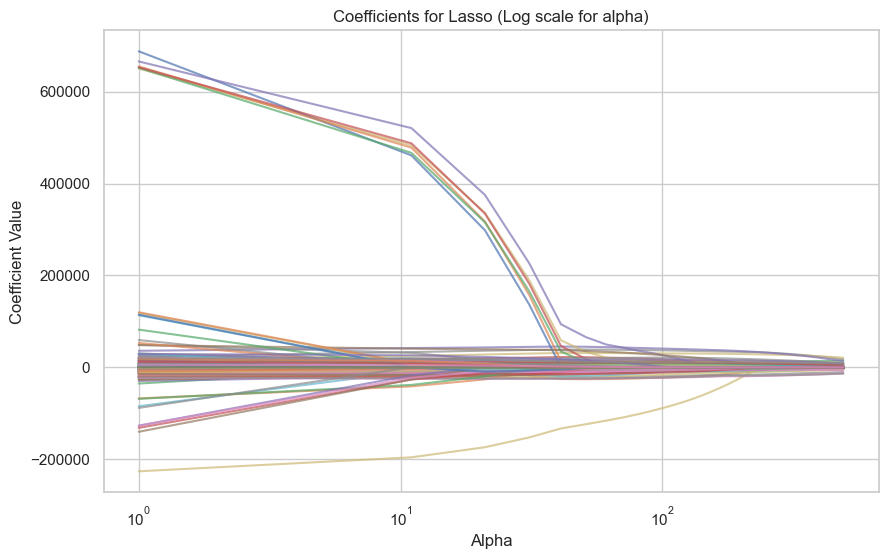

In [181]:
# График значений коэффициентов для Lasso
plt.figure(figsize=(10, 6))

for i in range(lasso_coefficients.shape[1]):
    plt.plot(alphas, lasso_coefficients[:, i], label=f'Feature {i+1}', alpha=0.7)

plt.legend().set_visible(False)

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients for Lasso (Log scale for alpha)')
plt.grid(True)
plt.show()


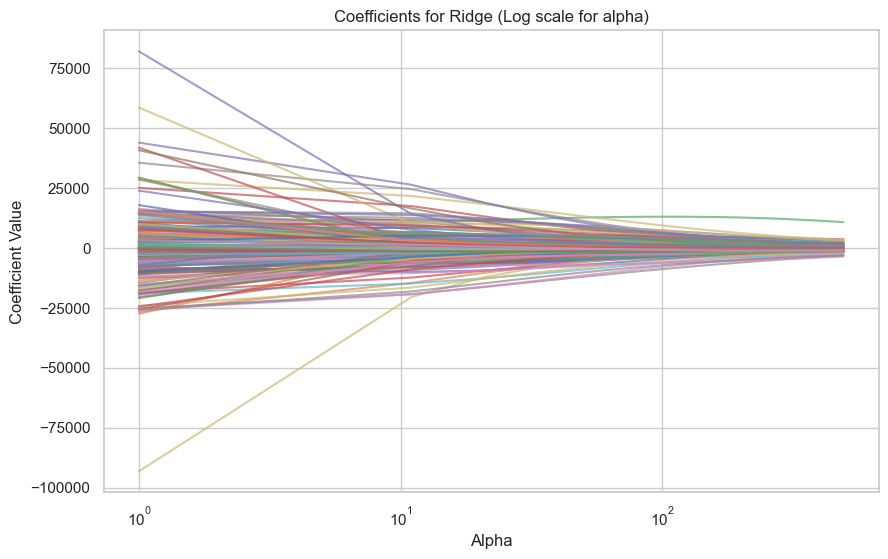

In [182]:
# График значений коэффициентов для Ridge
plt.figure(figsize=(10, 6))

for i in range(ridge_coefficients.shape[1]):
    plt.plot(alphas, ridge_coefficients[:, i], label=f'Feature {i+1}', alpha=0.7)

plt.legend().set_visible(False)

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficient Value')
plt.title('Coefficients for Ridge (Log scale for alpha)')
plt.grid(True)
plt.show()

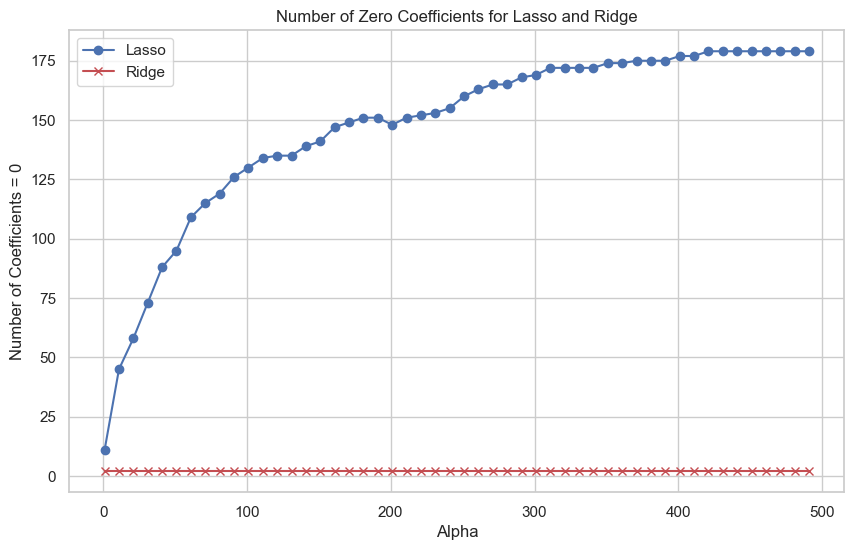

In [183]:
# Гистограмма количества коэффициентов, равных 0, для разных значений alpha
plt.figure(figsize=(10, 6))
plt.plot(alphas, lasso_zero_coefficients, label='Lasso', color='b', marker='o')
plt.plot(alphas, ridge_zero_coefficients, label='Ridge', color='r', marker='x')
plt.xlabel('Alpha')
plt.ylabel('Number of Coefficients = 0')
plt.title('Number of Zero Coefficients for Lasso and Ridge')
plt.legend()
plt.grid(True)
plt.show()

## 1.7 Поиск оптимального alpha (6 баллов)

- С помощью метода LassoCV найдите оптимальное значение alpha и напечатайте его, используя разбиение на 5 фолда в кроссвалидации (`cv=5`).
- Нарисуйте график зависимости MSE от alpha (`mse_path_`).
- Нарисуйте длинную гистограмму магнитуда признаков, как в классе, на которой будет показано значение коэффициента для каждого признака. Графк должен быть остортирован по величине коэффициентов. Признаки с нулевыми коэффициентами должны быть удалены.
- Сколько в итоге ненулевых признаков осталось?
- Выведите **среднее** ошибки предсказания на 5 фолдах (cv=5) для этой линейной регрессии с помощью функции [sklearn.model_selection.cross_val_score](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html). Укажите `scoring='neg_mean_squared_error'`, чтобы считалась [MSE](http://scikit-learn.org/stable/modules/model_evaluation.html#mean-squared-error). Качество должно быть лучше, чем у простой линейной регрессии.

In [184]:
from sklearn.linear_model import LassoCV

In [185]:
# Инициализация LassoCV с 5 фолдами
lasso_cv = LassoCV(cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# 1. Оптимальное значение alpha
optimal_alpha = lasso_cv.alpha_
print(f"Оптимальное значение alpha: {optimal_alpha}")

Оптимальное значение alpha: 221107.43079326706


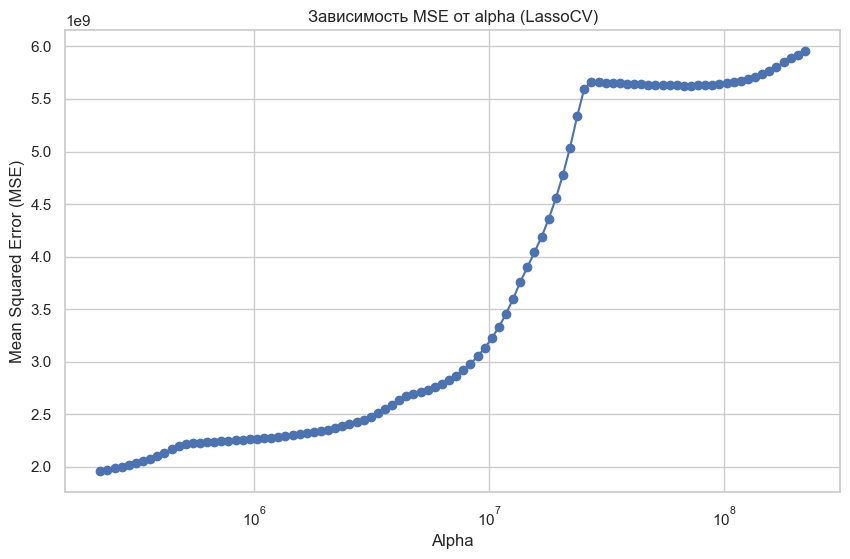

In [186]:
# 2. График зависимости MSE от alpha
mse_path = lasso_cv.mse_path_  # Массив MSE для различных значений alpha
alphas = lasso_cv.alphas_  # alpha

plt.figure(figsize=(10, 6))
plt.plot(alphas, mse_path.mean(axis=1), marker='o', color='b', label='MSE')
plt.xscale('log') # На логарифмической шкале удобнее смотреть
plt.xlabel('Alpha')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Зависимость MSE от alpha (LassoCV)')
plt.grid(True)
plt.show()

Осталось ненулевых признаков:  11


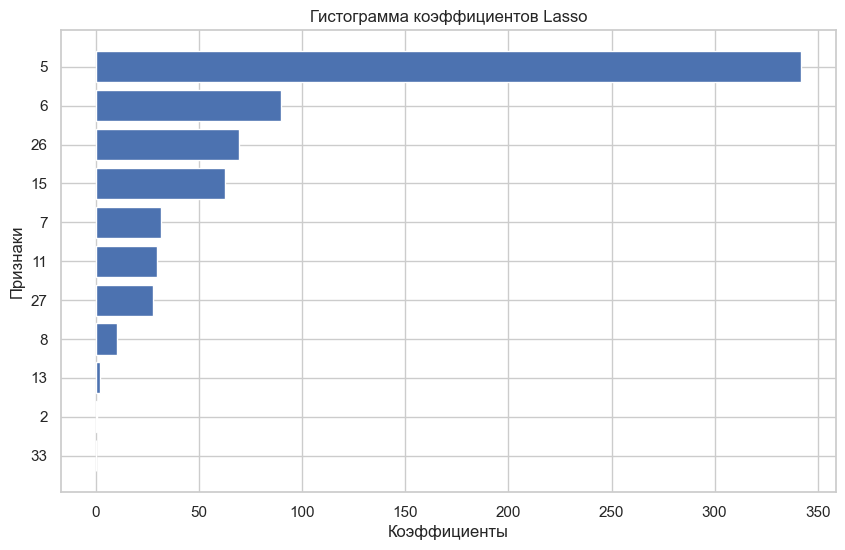

In [187]:
# 3. Гистограмма значений коэффициентов
coefficients = lasso_cv.coef_

# Удалим признаки с коэффициентами равными 0
non_zero_coefficients = coefficients[coefficients != 0]
non_zero_features = np.where(coefficients != 0)[0]  # Индексы признаков с ненулевыми коэффициентами

# Столько ненулевых признаков осталось:
print("Осталось ненулевых признаков: ", len(non_zero_features))

# Гистограмма коэффициентов, отсортированная по величине
sorted_indices = np.argsort(np.abs(non_zero_coefficients))
sorted_coefficients = non_zero_coefficients[sorted_indices]
sorted_features = non_zero_features[sorted_indices]

plt.figure(figsize=(10, 6))
plt.barh(range(len(sorted_coefficients)), sorted_coefficients, align='center')
plt.yticks(range(len(sorted_coefficients)), sorted_features + 1) 
plt.xlabel('Коэффициенты')
plt.ylabel('Признаки')
plt.title('Гистограмма коэффициентов Lasso')
plt.show()

In [188]:
# 4. Оценка качества модели с помощью кросс-валидации
mse_scores = cross_val_score(lasso_cv, X, y, cv=5, scoring='neg_mean_squared_error')
mean_mse = -mse_scores.mean()
print(f"Среднее значение ошибки MSE на 5 фолдах (Сейчас):             {mean_mse}")
print(f"Среднее значение ошибки MSE на 5 фолдах (Линейная регрессия): {mean_mse_linear}")


Среднее значение ошибки MSE на 5 фолдах (Сейчас):             1885748973.7168376
Среднее значение ошибки MSE на 5 фолдах (Линейная регрессия): 2020713369.7386296


## 1.8 Предсказание на отложенной выборке (3 балла)

- Используя [sklearn.model_selection.train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) разбейте датасет на 2 части - тренировочную и тестовую в соотношении 0.33. Не забудьте перемешать!
- Напечатайте размерность X_train и X_test

In [189]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle=True)
print(f"Размерность X_train: {X_train.shape}")
print(f"Размерность X_test: {X_test.shape}")

Размерность X_train: (978, 238)
Размерность X_test: (482, 238)


Теперь, возьмите вашу самую мощную модель(не тренированную!). Запустите её тренировку по тренировочной выборке X_train, y_train с помощью функции `fit`. Постройте предсказания с помощью функции `predict`.

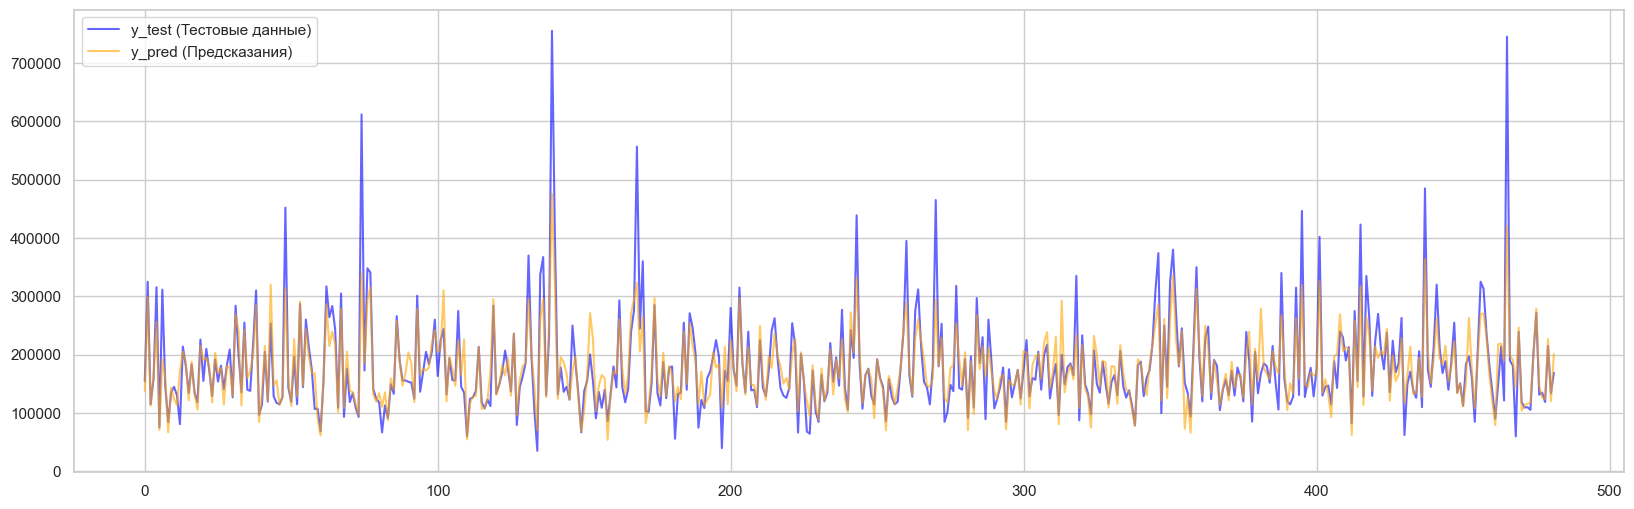

Прогнозы на тренировочной выборке: [137821.52789973 299490.75372406 112926.6639305  163204.87767625
 256174.06257963  71125.67384587 192352.06500203 160234.06779761
  67109.57166919 143594.49022465]
Среднеквадратическая ошибка на тренировочной выборке: 1773606820.614027


In [190]:


model = LassoCV(cv=5, random_state=42) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Строим график
plt.figure(figsize=(20, 6))
plt.plot(y_test.to_numpy(), label='y_test (Тестовые данные)', color='blue', alpha=0.6)
plt.plot(y_pred, label='y_pred (Предсказания)', color='orange', alpha=0.6)
plt.legend()

plt.show()

print("Прогнозы на тренировочной выборке:", y_pred[:10])

# Качество модели, с использованием MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратическая ошибка на тренировочной выборке: {mse}")

Визуализируйте scatter plot предсказанных значений и настоящих (`y_test`). У вас должен получиться график, точки которого расположены приблизительно вдоль некоторой прямой с разбросом. Идеальный предсказатель будет выглядить как набор точек вдоль прямой без разброса.

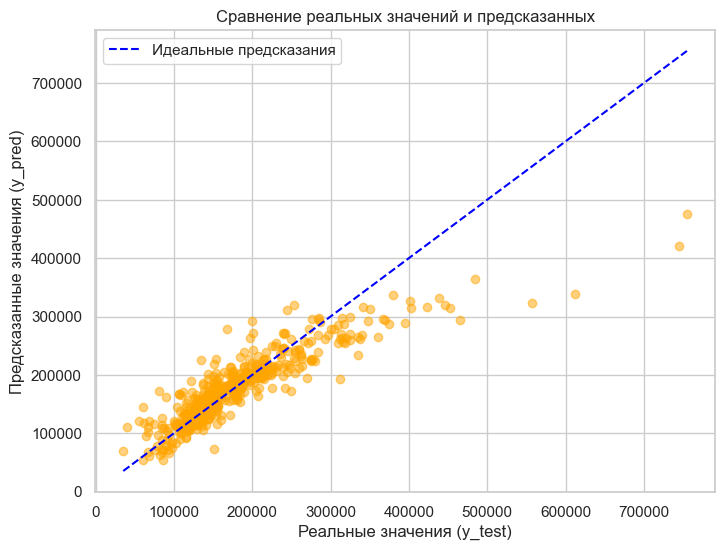

In [191]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange', alpha=0.5)

# Идеальная прямая (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Идеальные предсказания')

plt.title('Сравнение реальных значений и предсказанных')
plt.xlabel('Реальные значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.legend()

# Отображаем график
plt.show()

## 1.9 Ограниченная версия ( 4 балла)

Помните в самом начале мы оставили очень мало признаков по данным из heatmap. Настало время проверить как он себя покажет! К счастью они все сразу числовые, а не категориальные. Переиспользуйте тот дадасет, где вы уже поборолись с пропусками.
Снова выделите отдельно X и y и запустите кроссвалидацию c 5 фолдами по Lasso с `alpha=1`.

In [192]:
numeric_df_19 = df_cleaned.select_dtypes(include=[np.number])

In [193]:
X_19 = numeric_df_19.drop(columns=['SalePrice'])
y_19 = numeric_df_19['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X_19, y_19, test_size=0.33, random_state=42, shuffle=True)
print(f"Размерность X_train: {X_train.shape}")
print(f"Размерность X_test: {X_test.shape}")

Размерность X_train: (978, 35)
Размерность X_test: (482, 35)


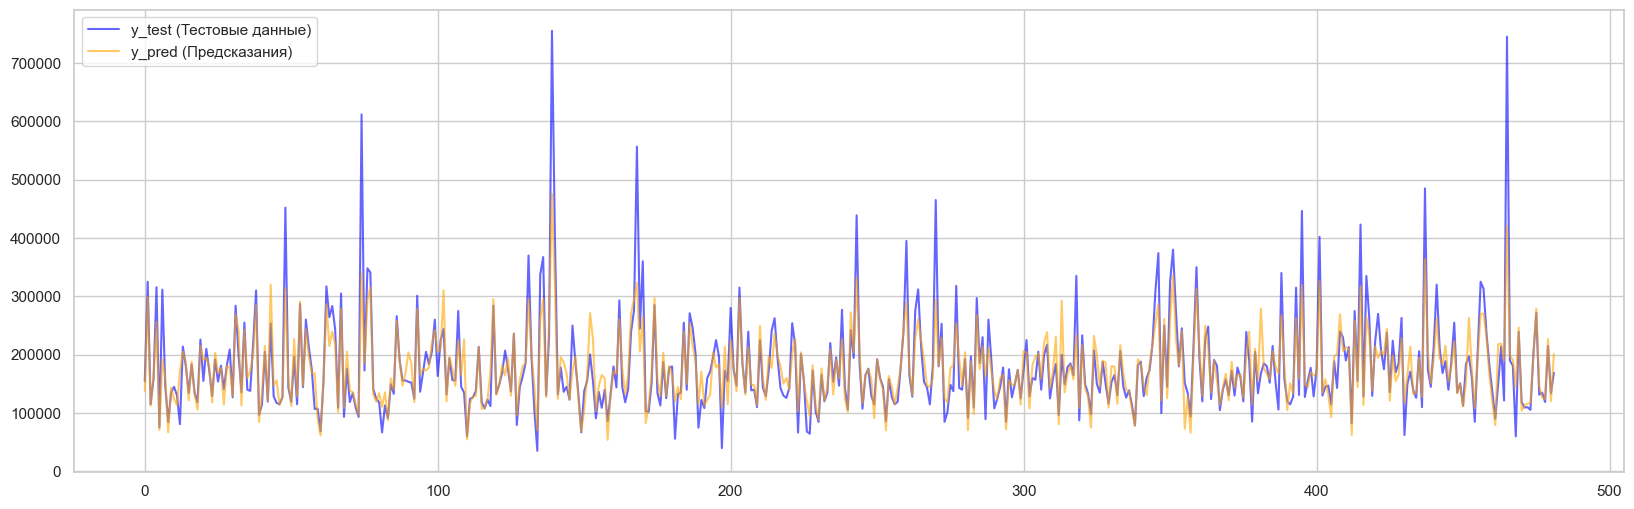

Прогнозы на тренировочной выборке: [137821.52789973 299490.75372406 112926.6639305  163204.87767625
 256174.06257963  71125.67384587 192352.06500203 160234.06779761
  67109.57166919 143594.49022465]
Среднеквадратическая ошибка на тренировочной выборке: 1773606820.614027


In [194]:
model = LassoCV(cv=5, random_state=42) 

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Строим график
plt.figure(figsize=(20, 6))
plt.plot(y_test.to_numpy(), label='y_test (Тестовые данные)', color='blue', alpha=0.6)
plt.plot(y_pred, label='y_pred (Предсказания)', color='orange', alpha=0.6)
plt.legend()

plt.show()

print("Прогнозы на тренировочной выборке:", y_pred[:10])

# Качество модели, с использованием MSE
mse = mean_squared_error(y_test, y_pred)
print(f"Среднеквадратическая ошибка на тренировочной выборке: {mse}")

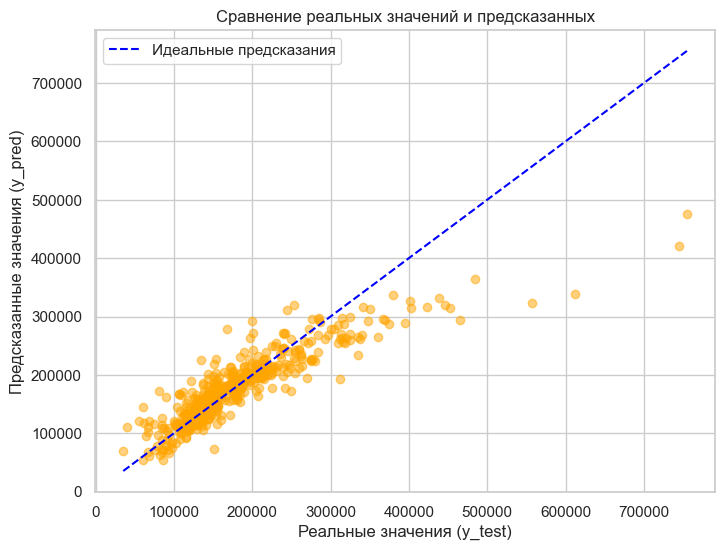

In [195]:
y_pred = model.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='orange', alpha=0.5)

# Идеальная прямая (y = x)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', linestyle='--', label='Идеальные предсказания')

plt.title('Сравнение реальных значений и предсказанных')
plt.xlabel('Реальные значения (y_test)')
plt.ylabel('Предсказанные значения (y_pred)')
plt.legend()

# Отображаем график
plt.show()

Можете посмотреть еще много разных примеров обработки этого датасета тут: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/kernels

А суть всего этого такова, что в итоге надо кучу времени потратить на подготовку признаков. Смотреть на кучу графиков а потом стакать модели.